In [66]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [67]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    preprocessing_function=preprocess_input, 
    validation_split=0.2
)

In [68]:
train_generator = datagen.flow_from_directory(
    '../data/base',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 1677 images belonging to 13 classes.


In [69]:
val_generator = datagen.flow_from_directory(
    '../data/base',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 416 images belonging to 13 classes.


In [70]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [71]:
base_model.trainable = False

In [72]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(13, activation='softmax')(x)

In [73]:
model = Model(inputs=base_model.input, outputs=output)

In [74]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator
)

Epoch 1/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 254ms/step - accuracy: 0.1090 - loss: 2.7355 - val_accuracy: 0.1731 - val_loss: 2.4482
Epoch 2/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.1746 - loss: 2.4150 - val_accuracy: 0.2139 - val_loss: 2.3631
Epoch 3/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 0.2540 - loss: 2.2888 - val_accuracy: 0.2163 - val_loss: 2.3848
Epoch 4/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.2701 - loss: 2.2110 - val_accuracy: 0.2524 - val_loss: 2.3152
Epoch 5/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.2712 - loss: 2.1591 - val_accuracy: 0.2236 - val_loss: 2.3363
Epoch 6/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.3158 - loss: 2.0437 - val_accuracy: 0.2716 - val_loss: 2.3534
Epoch 7/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.3325 - loss: 2.0352 - val_accuracy: 0.2308 - val_loss: 2.3138
Epoch 8/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.3520 - loss: 1.9634 - val_accu

In [76]:
import matplotlib.pyplot as plt

# Affiche la liste des métriques enregistrées
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


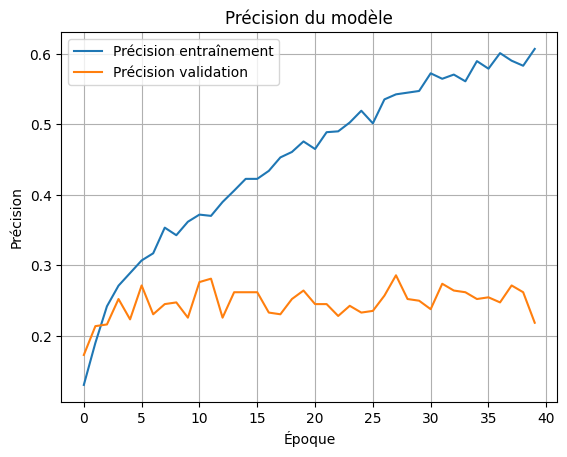

In [77]:
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.title("Précision du modèle")
plt.xlabel("Époque")
plt.ylabel("Précision")
plt.legend()
plt.grid(True)
plt.show()

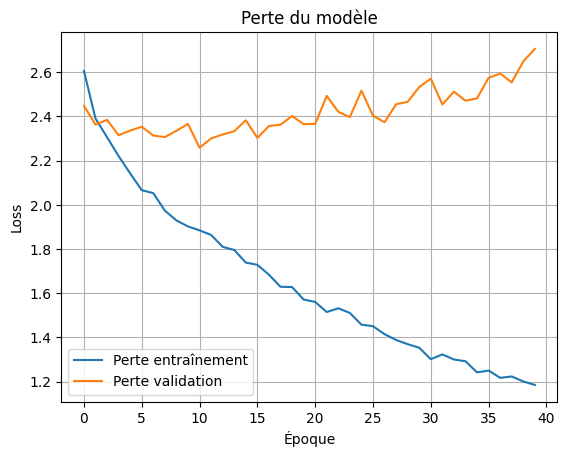

In [78]:
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title("Perte du modèle")
plt.xlabel("Époque")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step


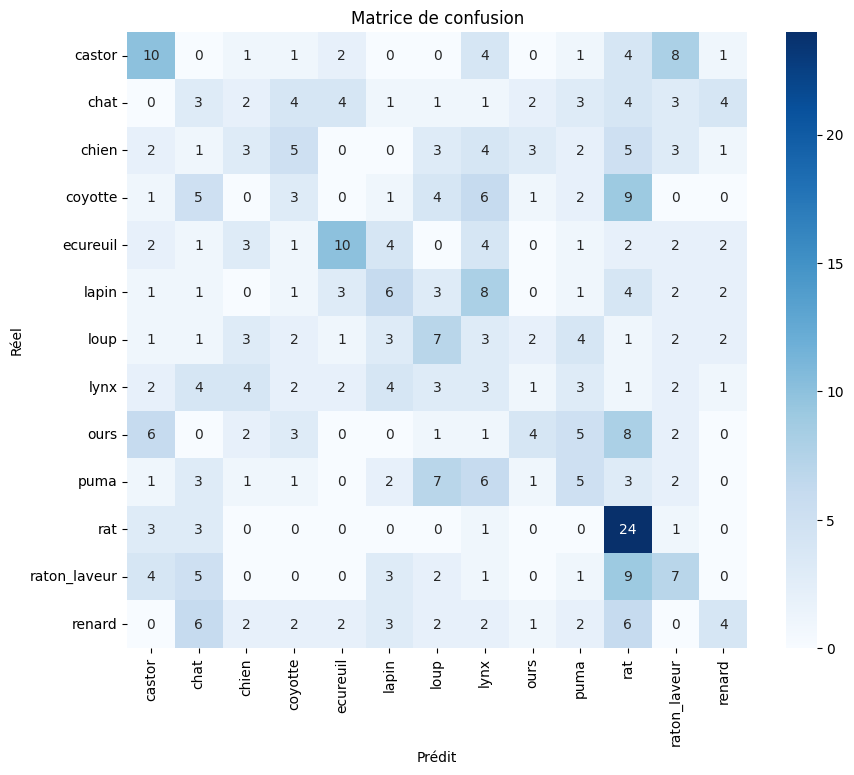

In [79]:
!pip install scikit-learn
!pip install seaborn

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Prédictions
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()